In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import numpy as np
from datetime import datetime

In [2]:
july_trips = pd.read_csv('../data/july_trip.csv')

In [3]:
july_trips.startTime = pd.to_datetime(july_trips.startTime)
july_trips.startDate = pd.to_datetime(july_trips.startDate)
july_trips.endTime = pd.to_datetime(july_trips.endTime)
july_trips.endDate = pd.to_datetime(july_trips.endDate)
july_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134926 entries, 0 to 134925
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   pubTimeStamp    134926 non-null  object        
 1   companyName     134926 non-null  object        
 2   tripRecordNum   134926 non-null  object        
 3   sumdID          134926 non-null  object        
 4   tripDuration    134926 non-null  float64       
 5   tripDistance    134926 non-null  float64       
 6   startDate       134926 non-null  datetime64[ns]
 7   startTime       134926 non-null  datetime64[ns]
 8   endDate         134926 non-null  datetime64[ns]
 9   endTime         134926 non-null  datetime64[ns]
 10  startLatitude   134926 non-null  float64       
 11  startLongitude  134926 non-null  float64       
 12  endLatitude     134926 non-null  float64       
 13  endLongitude    134926 non-null  float64       
 14  tripRoute       134926 non-null  obj

In [4]:
july_trips['startTime_clean'] = pd.DatetimeIndex(july_trips['startTime']).time
july_trips['endTime_clean'] = pd.DatetimeIndex(july_trips['endTime']).time
july_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startTime_clean,endTime_clean
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01,2021-10-26 00:01:32.290000,2019-07-01,2021-10-26 00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000,00:01:32.290000,00:03:55.966666
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01,2021-10-26 00:02:38.640000,2019-07-01,2021-10-26 00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000,00:02:38.640000,00:02:54.406666
2,2019-07-01 00:02:52.213000,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01,2021-10-26 00:03:04.333333,2019-07-01,2021-10-26 00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000,00:03:04.333333,00:03:37.680000
3,2019-07-01 00:02:52.213000,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01,2021-10-26 00:02:06.963333,2019-07-01,2021-10-26 00:03:25.766666,36.1525,-86.7988,36.1525,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000,00:02:06.963333,00:03:25.766666
4,2019-07-01 00:02:52.213000,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01,2021-10-26 00:01:19.843333,2019-07-01,2021-10-26 00:02:53.976666,36.1578,-86.7760,36.1575,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000,00:01:19.843333,00:02:53.976666


In [6]:
july_trips['startDate'] = july_trips['startDate'].astype('str')
july_trips['startTime_clean'] = july_trips['startTime_clean'].astype('str')
july_trips['startDateTime_clean'] = july_trips['startDate'] + ' ' + july_trips['startTime_clean']
july_trips['endDate'] = july_trips['endDate'].astype('str')
july_trips['endTime_clean'] = july_trips['endTime_clean'].astype('str')
july_trips['endDateTime_clean'] = july_trips['endDate'] + ' ' + july_trips['endTime_clean']
july_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startTime_clean,endTime_clean,startDateTime_clean,endDateTime_clean
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01,2021-10-26 00:01:32.290000,2019-07-01,2021-10-26 00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000,00:01:32.290000,00:03:55.966666,2019-07-01 00:01:32.290000,2019-07-01 00:03:55.966666
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01,2021-10-26 00:02:38.640000,2019-07-01,2021-10-26 00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000,00:02:38.640000,00:02:54.406666,2019-07-01 00:02:38.640000,2019-07-01 00:02:54.406666
2,2019-07-01 00:02:52.213000,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01,2021-10-26 00:03:04.333333,2019-07-01,2021-10-26 00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000,00:03:04.333333,00:03:37.680000,2019-07-01 00:03:04.333333,2019-07-01 00:03:37.680000
3,2019-07-01 00:02:52.213000,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01,2021-10-26 00:02:06.963333,2019-07-01,2021-10-26 00:03:25.766666,36.1525,-86.7988,36.1525,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000,00:02:06.963333,00:03:25.766666,2019-07-01 00:02:06.963333,2019-07-01 00:03:25.766666
4,2019-07-01 00:02:52.213000,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01,2021-10-26 00:01:19.843333,2019-07-01,2021-10-26 00:02:53.976666,36.1578,-86.7760,36.1575,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000,00:01:19.843333,00:02:53.976666,2019-07-01 00:01:19.843333,2019-07-01 00:02:53.976666


In [7]:
july_trips.endDateTime_clean = pd.to_datetime(july_trips.endDateTime_clean)
july_trips.startDateTime_clean = pd.to_datetime(july_trips.startDateTime_clean)
july_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134926 entries, 0 to 134925
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   pubTimeStamp         134926 non-null  object        
 1   companyName          134926 non-null  object        
 2   tripRecordNum        134926 non-null  object        
 3   sumdID               134926 non-null  object        
 4   tripDuration         134926 non-null  float64       
 5   tripDistance         134926 non-null  float64       
 6   startDate            134926 non-null  object        
 7   startTime            134926 non-null  datetime64[ns]
 8   endDate              134926 non-null  object        
 9   endTime              134926 non-null  datetime64[ns]
 10  startLatitude        134926 non-null  float64       
 11  startLongitude       134926 non-null  float64       
 12  endLatitude          134926 non-null  float64       
 13  endLongitude  

In [8]:
july_trips['duration_clean'] = july_trips['endDateTime_clean'] - july_trips['startDateTime_clean']
july_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134926 entries, 0 to 134925
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   pubTimeStamp         134926 non-null  object         
 1   companyName          134926 non-null  object         
 2   tripRecordNum        134926 non-null  object         
 3   sumdID               134926 non-null  object         
 4   tripDuration         134926 non-null  float64        
 5   tripDistance         134926 non-null  float64        
 6   startDate            134926 non-null  object         
 7   startTime            134926 non-null  datetime64[ns] 
 8   endDate              134926 non-null  object         
 9   endTime              134926 non-null  datetime64[ns] 
 10  startLatitude        134926 non-null  float64        
 11  startLongitude       134926 non-null  float64        
 12  endLatitude          134926 non-null  float64        
 13 

In [9]:
july_trips['duration_sec'] = (july_trips.duration_clean / np.timedelta64(1,'s')).astype(int)
july_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,endLatitude,endLongitude,tripRoute,create_dt,startTime_clean,endTime_clean,startDateTime_clean,endDateTime_clean,duration_clean,duration_sec
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01,2021-10-26 00:01:32.290000,2019-07-01,2021-10-26 00:03:55.966666,...,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000,00:01:32.290000,00:03:55.966666,2019-07-01 00:01:32.290000,2019-07-01 00:03:55.966666,0 days 00:02:23.676666,143
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01,2021-10-26 00:02:38.640000,2019-07-01,2021-10-26 00:02:54.406666,...,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000,00:02:38.640000,00:02:54.406666,2019-07-01 00:02:38.640000,2019-07-01 00:02:54.406666,0 days 00:00:15.766666,15
2,2019-07-01 00:02:52.213000,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01,2021-10-26 00:03:04.333333,2019-07-01,2021-10-26 00:03:37.680000,...,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000,00:03:04.333333,00:03:37.680000,2019-07-01 00:03:04.333333,2019-07-01 00:03:37.680000,0 days 00:00:33.346667,33
3,2019-07-01 00:02:52.213000,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01,2021-10-26 00:02:06.963333,2019-07-01,2021-10-26 00:03:25.766666,...,36.1525,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000,00:02:06.963333,00:03:25.766666,2019-07-01 00:02:06.963333,2019-07-01 00:03:25.766666,0 days 00:01:18.803333,78
4,2019-07-01 00:02:52.213000,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01,2021-10-26 00:01:19.843333,2019-07-01,2021-10-26 00:02:53.976666,...,36.1575,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000,00:01:19.843333,00:02:53.976666,2019-07-01 00:01:19.843333,2019-07-01 00:02:53.976666,0 days 00:01:34.133333,94


In [10]:
july_trips['duration_sec'] = (july_trips.duration_clean / np.timedelta64(1,'s')).astype(int)
july_trips['duration_min'] = july_trips.duration_sec / 60
july_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,endLongitude,tripRoute,create_dt,startTime_clean,endTime_clean,startDateTime_clean,endDateTime_clean,duration_clean,duration_sec,duration_min
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01,2021-10-26 00:01:32.290000,2019-07-01,2021-10-26 00:03:55.966666,...,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000,00:01:32.290000,00:03:55.966666,2019-07-01 00:01:32.290000,2019-07-01 00:03:55.966666,0 days 00:02:23.676666,143,2.383333
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01,2021-10-26 00:02:38.640000,2019-07-01,2021-10-26 00:02:54.406666,...,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000,00:02:38.640000,00:02:54.406666,2019-07-01 00:02:38.640000,2019-07-01 00:02:54.406666,0 days 00:00:15.766666,15,0.250000
2,2019-07-01 00:02:52.213000,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01,2021-10-26 00:03:04.333333,2019-07-01,2021-10-26 00:03:37.680000,...,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000,00:03:04.333333,00:03:37.680000,2019-07-01 00:03:04.333333,2019-07-01 00:03:37.680000,0 days 00:00:33.346667,33,0.550000
3,2019-07-01 00:02:52.213000,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01,2021-10-26 00:02:06.963333,2019-07-01,2021-10-26 00:03:25.766666,...,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000,00:02:06.963333,00:03:25.766666,2019-07-01 00:02:06.963333,2019-07-01 00:03:25.766666,0 days 00:01:18.803333,78,1.300000
4,2019-07-01 00:02:52.213000,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01,2021-10-26 00:01:19.843333,2019-07-01,2021-10-26 00:02:53.976666,...,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000,00:01:19.843333,00:02:53.976666,2019-07-01 00:01:19.843333,2019-07-01 00:02:53.976666,0 days 00:01:34.133333,94,1.566667


In [11]:
july_trips = july_trips.drop(columns = ['duration_sec', 'startTime_clean', 'endTime_clean'])
july_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startDateTime_clean,endDateTime_clean,duration_clean,duration_min
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01,2021-10-26 00:01:32.290000,2019-07-01,2021-10-26 00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000,2019-07-01 00:01:32.290000,2019-07-01 00:03:55.966666,0 days 00:02:23.676666,2.383333
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01,2021-10-26 00:02:38.640000,2019-07-01,2021-10-26 00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000,2019-07-01 00:02:38.640000,2019-07-01 00:02:54.406666,0 days 00:00:15.766666,0.250000
2,2019-07-01 00:02:52.213000,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01,2021-10-26 00:03:04.333333,2019-07-01,2021-10-26 00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000,2019-07-01 00:03:04.333333,2019-07-01 00:03:37.680000,0 days 00:00:33.346667,0.550000
3,2019-07-01 00:02:52.213000,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01,2021-10-26 00:02:06.963333,2019-07-01,2021-10-26 00:03:25.766666,36.1525,-86.7988,36.1525,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000,2019-07-01 00:02:06.963333,2019-07-01 00:03:25.766666,0 days 00:01:18.803333,1.300000
4,2019-07-01 00:02:52.213000,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01,2021-10-26 00:01:19.843333,2019-07-01,2021-10-26 00:02:53.976666,36.1578,-86.7760,36.1575,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000,2019-07-01 00:01:19.843333,2019-07-01 00:02:53.976666,0 days 00:01:34.133333,1.566667


In [12]:
july_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134926 entries, 0 to 134925
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   pubTimeStamp         134926 non-null  object         
 1   companyName          134926 non-null  object         
 2   tripRecordNum        134926 non-null  object         
 3   sumdID               134926 non-null  object         
 4   tripDuration         134926 non-null  float64        
 5   tripDistance         134926 non-null  float64        
 6   startDate            134926 non-null  object         
 7   startTime            134926 non-null  datetime64[ns] 
 8   endDate              134926 non-null  object         
 9   endTime              134926 non-null  datetime64[ns] 
 10  startLatitude        134926 non-null  float64        
 11  startLongitude       134926 non-null  float64        
 12  endLatitude          134926 non-null  float64        
 13 

In [13]:
july_adj = july_trips.loc[(july_trips.duration_min < 60)]
july_adj.describe()

,tripDuration,tripDistance,startLatitude,startLongitude,endLatitude,endLongitude,duration_clean,duration_min
count,130874.000000,1.308740e+05,130874.000000,130874.00000,130874.000000,130874.000000,130874,130874.000000
mean,67.618580,4.861180e+03,36.156734,-86.78513,36.156674,-86.785519,0 days 00:13:24.170189928,13.398320
std,305.744831,1.427077e+05,0.010937,0.01394,0.120262,0.402579,0 days 00:11:48.168908520,11.803158
min,-19.358267,-2.032480e+07,35.853200,-86.89085,0.000000,-122.673729,-1 days +23:40:38.506667,-19.350000
25%,5.000000,3.189160e+02,36.150940,-86.79300,36.151034,-86.792464,0 days 00:04:53.472500,4.883333
50%,10.000000,2.890420e+03,36.157200,-86.78216,36.157663,-86.781541,0 days 00:09:34.928333,9.566667
75%,20.000000,6.578083e+03,36.162900,-86.77670,36.162789,-86.776570,0 days 00:18:17,18.283333
max,3595.000000,3.188448e+07,36.299569,-86.36620,51.045409,0.000000,0 days 00:59:59.660000,59.983333


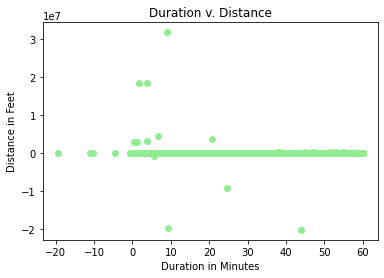

In [17]:
plt.scatter('duration_min', 'tripDistance', data = july_adj, color = 'lightgreen')
plt.xlabel('Duration in Minutes')
plt.ylabel('Distance in Feet')
plt.title('Duration v. Distance')
plt.show()

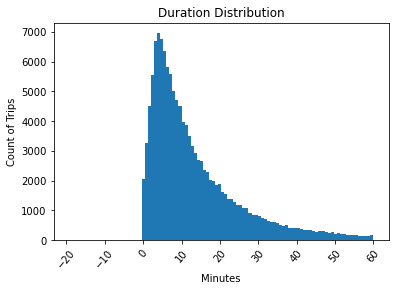

In [16]:
plt.hist(july_adj.duration_min, bins = 100)
plt.xticks(rotation=50)
plt.title('Duration Distribution')
plt.xlabel('Minutes')
plt.ylabel('Count of Trips')
plt.show()